# Data Science Intern @LGMVIP July, 2022

## Advanced Level Task - 01

# Title : Develop A Neural Network That Can Read Handwriting

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Download MNIST Dataset

In [71]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [72]:
len(X_train)

60000

In [73]:
len(X_test)

10000

In [74]:
X_train[0].shape

(28, 28)

In [75]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# Visualizing the Images

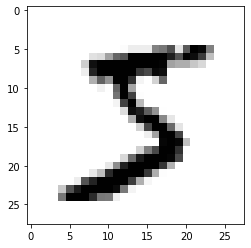

In [76]:
plt.imshow(X_train[0], cmap=plt.cm.gray_r,interpolation='nearest')

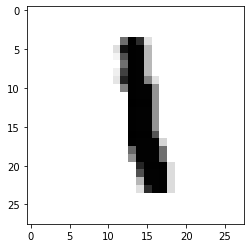

In [77]:
plt.imshow(X_train[6], cmap=plt.cm.gray_r,interpolation='nearest')

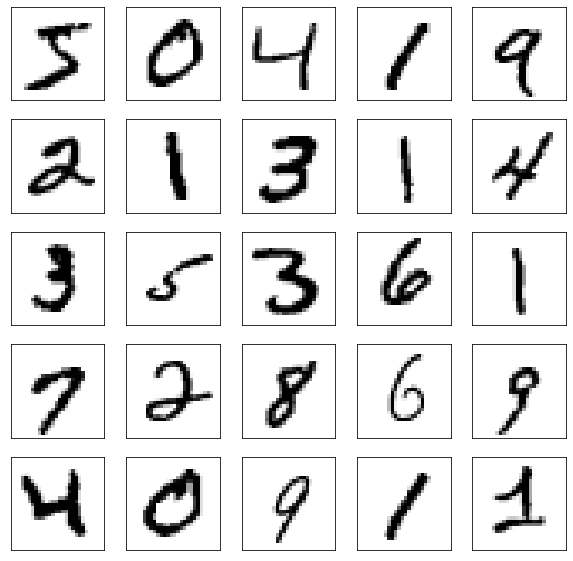

In [78]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [79]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

# Flatten the Dataset

In [80]:
X_train=X_train/255
X_test=X_test/255

In [81]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [82]:
X_train_flattened.shape

(60000, 784)

In [83]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [84]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4705 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3039 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2834 - accuracy: 0.9218
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2665 - accuracy: 0.9260


In [85]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2653 - accuracy: 0.9268


[0.26528844237327576, 0.926800012588501]

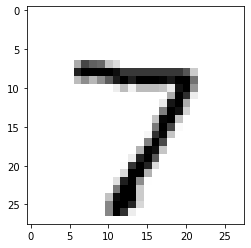

In [86]:
plt.imshow(X_test[0], cmap=plt.cm.gray_r,interpolation='nearest')

In [87]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.2165039e-02, 4.2117105e-07, 6.2165827e-02, 9.4288337e-01,
       2.6716476e-03, 1.1178934e-01, 1.1778662e-06, 9.9986792e-01,
       1.3554852e-01, 7.0047951e-01], dtype=float32)

In [88]:
np.argmax(y_predicted[0])

7

In [89]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [90]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    1,    0,    5,    5,    3,    2,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   7,    9,  921,   15,   10,    4,   12,   11,   39,    4],
       [   4,    0,   21,  915,    1,   25,    2,   10,   24,    8],
       [   1,    1,    3,    1,  918,    0,   10,    3,   10,   35],
       [  10,    3,    2,   26,   11,  777,   13,    7,   35,    8],
       [  12,    3,    7,    1,    8,   13,  909,    2,    3,    0],
       [   1,    5,   21,    7,   10,    0,    0,  947,    3,   34],
       [   5,    7,    6,   15,    9,   20,    8,   11,  884,    9],
       [  11,    7,    1,    9,   23,    5,    0,   23,    8,  922]])>

Text(69.0, 0.5, 'Truth')

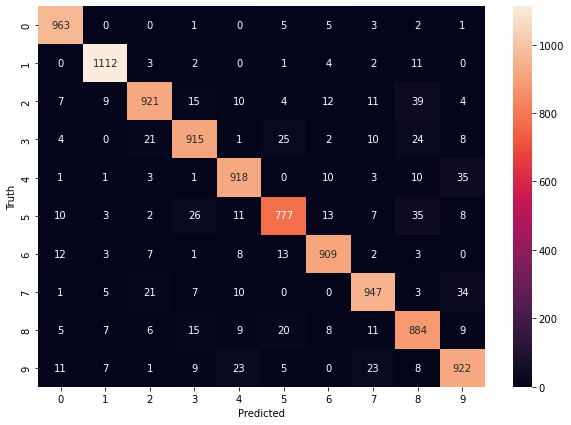

In [91]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Hidden Layer

In [92]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2740 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1222 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0855 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0646 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0513 - accuracy: 0.9843


In [93]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0784 - accuracy: 0.9761


[0.07841446250677109, 0.9761000275611877]

In [94]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

313/313 [==============================] - 1s 3ms/step


Text(69.0, 0.5, 'Truth')

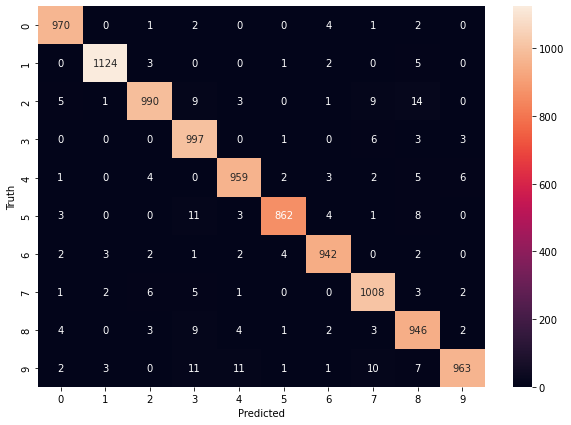

In [97]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')